<a href="https://colab.research.google.com/github/KaylumCassidy/FYP/blob/main/Predicting_Wind_Energy_Generation__C20323831_FYP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting wind energy generation to enable transmission system operator (TSO) supply planning.**

This dissertation focuses on using high-frequency short-term weather forecasting to predict wind production in Ireland. The aim is to prepare microgrid control systems for periods of low wind power generation, crucial for stabilizing the country's energy mix. Clear objectives include testing predictive analytical techniques, finding the most accurate model algorithm, determining influential weather variables, and validating against existing models

## Irish weather data

### Import libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import io
import requests

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly import tools
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

from datetime import tzinfo, timedelta, datetime
minDate = "2017-01-01 00:00:00"

In [2]:
  # This Python 3 environment comes with many helpful analytics libraries installed
  # It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
  # For example, here's several helpful packages to load in

  import numpy as np # linear algebra
  import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

  import io
  import requests

  import plotly.offline as py
  py.init_notebook_mode(connected=True)
  import plotly.graph_objs as go
  from plotly import tools
  import plotly.figure_factory as ff
  from plotly.subplots import make_subplots

  import warnings
  warnings.filterwarnings('ignore')

  import matplotlib.pyplot as plt
  plt.style.use('seaborn-whitegrid')

  from datetime import tzinfo, timedelta, datetime, date

In [3]:
minDate = "2017-01-01 00:00:00"

### Loading MerEire dataset 2017-2023

This dataset is from MetEire website form 2017-2023 I choose 7 weather station(Dublin Airport, Shannon Airport, Mayo, Donegal, Galway, Cork) each recroding every hour of evvery day. (Dataset colm meaning in photo below)

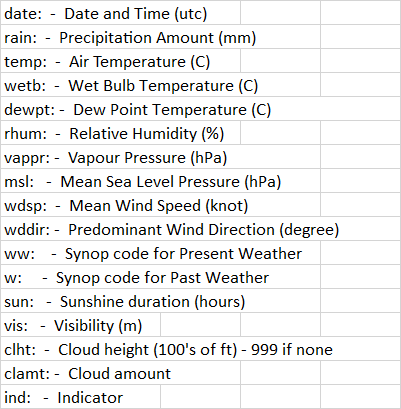![image.png]()

**CORK**

In [4]:
import pandas as pd
import requests
from io import StringIO

github_raw_url = 'https://raw.githubusercontent.com/KaylumCassidy/FYP/main/CorkAirport.csv'

# Fetch the content of the file
response = requests.get(github_raw_url)
s = response.content

# Read the CSV file into a pandas DataFrame
corkairportds = pd.read_csv(StringIO(s.decode('utf-8')))

# Display the column names
print(corkairportds.columns)

# Convert the 'date' column to datetime format
corkairportds['date'] = pd.to_datetime(corkairportds['date'], format='%d/%m/%Y %H:%M', errors='ignore')

# Fix the 'wdsp' column with space value
corkairportds['wdsp'].replace(to_replace=' ', value=0, inplace=True)
corkairportds['wdsp'] = corkairportds['wdsp'].astype('float32')  # Change to float if necessary

# Replace "your_min_date_here" with an actual minimum date in the correct format
minDate = pd.to_datetime('01/01/2017 00:00', format='%d/%m/%Y %H:%M')  # Adjust the date and format as needed

# Reduce the timeframe
corkairportds = corkairportds[corkairportds['date'] >= minDate]



Index(['date', 'ind', 'rain', 'ind.1', 'temp', 'ind.2', 'wetb', 'dewpt',
       'vappr', 'rhum', 'msl', 'ind.3', 'wdsp', 'ind.4', 'wddir', 'ww', 'w',
       'sun', 'vis', 'clht', 'clamt'],
      dtype='object')


**Shannon Airport**

In [5]:
import pandas as pd
import requests
from io import StringIO

github_raw_url = 'https://raw.githubusercontent.com/KaylumCassidy/FYP/main/ShannonAirport.csv'

# Fetch the content of the file
response = requests.get(github_raw_url)
s = response.content

# Read the CSV file into a pandas DataFrame
shannonAirport = pd.read_csv(StringIO(s.decode('utf-8')))

# Display the column names
print(shannonAirport.columns)

# Convert the 'date' column to datetime format
shannonAirport['date'] = pd.to_datetime(shannonAirport['date'], format='%d/%m/%Y %H:%M', errors='ignore')

# Fix the 'wdsp' column with space value
shannonAirport['wdsp'].replace(to_replace=' ', value=0, inplace=True)
shannonAirport['wdsp'] = shannonAirport['wdsp'].astype('float32')  # Change to float if necessary

# Replace "your_min_date_here" with an actual minimum date in the correct format
minDate = pd.to_datetime('01/01/2017 00:00', format='%d/%m/%Y %H:%M')  # Adjust the date and format as needed

# Reduce the timeframe
shannonAirport = shannonAirport[shannonAirport['date'] >= minDate]



Index(['date', 'ind', 'rain', 'ind.1', 'temp', 'ind.2', 'wetb', 'dewpt',
       'vappr', 'rhum', 'msl', 'ind.3', 'wdsp', 'ind.4', 'wddir', 'ww', 'w',
       'sun', 'vis', 'clht', 'clamt'],
      dtype='object')


**Galway**

In [6]:
import pandas as pd
import requests
from io import StringIO


github_raw_url = 'https://raw.githubusercontent.com/KaylumCassidy/FYP/main/Galway.csv'

# Fetch the content of the file
response = requests.get(github_raw_url)
s = response.content

# Read the CSV file into a pandas DataFrame
galway = pd.read_csv(StringIO(s.decode('utf-8')))

# Display the column names
print(galway.columns)

# Convert the 'date' column to datetime format
galway['date'] = pd.to_datetime(galway['date'], format='%d/%m/%Y %H:%M', errors='ignore')

# Fix the 'wdsp' column with space value
galway['wdsp'].replace(to_replace=' ', value=0, inplace=True)
galway['wdsp'] = galway['wdsp'].astype('float32')  # Change to float if necessary

# Replace "your_min_date_here" with an actual minimum date in the correct format
minDate = pd.to_datetime('01/01/2017 00:00', format='%d/%m/%Y %H:%M')  # Adjust the date and format as needed

# Reduce the timeframe
galway = galway[galway['date'] >= minDate]



Index(['date', 'ind', 'rain', 'ind.1', 'temp', 'ind.2', 'wetb', 'dewpt',
       'vappr', 'rhum', 'msl', 'ind.3', 'wdsp', 'ind.4', 'wddir'],
      dtype='object')


**Dublin Airport**

In [7]:
import pandas as pd
import requests
from io import StringIO

github_raw_url = 'https://raw.githubusercontent.com/KaylumCassidy/FYP/main/DublinAirport.csv'

# Fetch the content of the file
response = requests.get(github_raw_url)
s = response.content

# Read the CSV file into a pandas DataFrame
dublinairportds = pd.read_csv(StringIO(s.decode('utf-8')))

# Display the column names
print(dublinairportds.columns)

# Convert the 'date' column to datetime format
dublinairportds['date'] = pd.to_datetime(dublinairportds['date'], format='%d/%m/%Y %H:%M', errors='ignore')

# Fix the 'wdsp' column with space value
dublinairportds['wdsp'].replace(to_replace=' ', value=0, inplace=True)
dublinairportds['wdsp'] = dublinairportds['wdsp'].astype('float32')  # Change to float if necessary

# Replace "your_min_date_here" with an actual minimum date in the correct format
minDate = pd.to_datetime('01/01/2017 00:00', format='%d/%m/%Y %H:%M')  # Adjust the date and format as needed

# Reduce the timeframe
dublinairportds = dublinairportds[dublinairportds['date'] >= minDate]


Index(['date', 'ind', 'rain', 'ind.1', 'temp', 'ind.2', 'wetb', 'dewpt',
       'vappr', 'rhum', 'msl', 'ind.3', 'wdsp', 'ind.4', 'wddir', 'ww', 'w',
       'sun', 'vis', 'clht', 'clamt'],
      dtype='object')


In [8]:
dublinairportds.describe()

,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,ind.3,wdsp,ind.4,wddir,ww,w,sun,clht,clamt
count,61345.000000,61345.000000,61345.000000,61345.000000,61345.000000,61345.000000,61345.00000,61345.000000,61345.000000,61345.000000,61345.000000,61345.000000,61345.000000,61345.000000,61345.000000,61345.000000,61345.000000,61345.000000,61345.000000
mean,0.493765,0.087166,0.019594,10.113817,0.027614,8.597198,6.93634,10.400083,81.755172,1013.401697,2.000065,9.475866,2.000065,206.367919,14.756769,29.447388,0.169494,286.170055,5.583797
std,0.980092,0.420248,0.138602,5.062082,0.163866,4.457445,4.52180,3.173393,11.991678,12.671529,0.011420,4.681316,0.011420,81.329671,22.707006,26.964605,0.323256,401.147943,2.223360
min,0.000000,0.000000,0.000000,-5.600000,0.000000,-5.900000,-8.90000,3.100000,24.000000,961.800000,2.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,6.600000,0.000000,5.400000,3.60000,7.900000,74.000000,1005.400000,2.000000,6.000000,2.000000,140.000000,2.000000,11.000000,0.000000,24.000000,4.000000
50%,0.000000,0.000000,0.000000,10.100000,0.000000,8.700000,7.10000,10.100000,84.000000,1014.900000,2.000000,9.000000,2.000000,230.000000,2.000000,11.000000,0.000000,50.000000,7.000000
75%,0.000000,0.000000,0.000000,13.700000,0.000000,12.000000,10.20000,12.500000,91.000000,1022.300000,2.000000,12.000000,2.000000,270.000000,21.000000,62.000000,0.100000,250.000000,7.000000
max,3.000000,13.800000,1.000000,29.100000,1.000000,21.400000,19.50000,22.600000,100.000000,1048.200000,4.000000,44.000000,4.000000,360.000000,97.000000,98.000000,1.000000,999.000000,9.000000


**Malin Head(Donengal)**

In [9]:
import pandas as pd
import requests
from io import StringIO

github_raw_url = 'https://raw.githubusercontent.com/KaylumCassidy/FYP/main/Malin%20Head.csv'

# Fetch the content of the file
response = requests.get(github_raw_url)
s = response.content

# Read the CSV file into a pandas DataFrame
malinHead = pd.read_csv(StringIO(s.decode('utf-8')))

# Display the column names
print(malinHead.columns)

# Convert the 'date' column to datetime format
malinHead['date'] = pd.to_datetime(malinHead['date'], format='%d/%m/%Y %H:%M', errors='ignore')

# Fix the 'wdsp' column with space value
malinHead['wdsp'].replace(to_replace=' ', value=0, inplace=True)
malinHead['wdsp'] = malinHead['wdsp'].astype('float32')  # Change to float if necessary

# Replace "your_min_date_here" with an actual minimum date in the correct format
minDate = pd.to_datetime('01/01/2017 00:00', format='%d/%m/%Y %H:%M')  # Adjust the date and format as needed

# Reduce the timeframe
malinHead = malinHead[malinHead['date'] >= minDate]



Index(['date', 'ind', 'rain', 'ind.1', 'temp', 'ind.2', 'wetb', 'dewpt',
       'vappr', 'rhum', 'msl', 'ind.3', 'wdsp', 'ind.4', 'wddir'],
      dtype='object')


**BELMULLET**

In [10]:
import pandas as pd
import requests
from io import StringIO

github_raw_url = 'https://raw.githubusercontent.com/KaylumCassidy/FYP/main/BELMULLET.csv'

# Fetch the content of the file
response = requests.get(github_raw_url)
s = response.content

# Read the CSV file into a pandas DataFrame
belmullet = pd.read_csv(StringIO(s.decode('utf-8')))

# Display the column names
print(belmullet.columns)

# Convert the 'date' column to datetime format
belmullet['date'] = pd.to_datetime(belmullet['date'], format='%d/%m/%Y %H:%M', errors='ignore')

# Fix the 'wdsp' column with space value
belmullet['wdsp'].replace(to_replace=' ', value=0, inplace=True)
belmullet['wdsp'] = belmullet['wdsp'].astype('float32')  # Change to float if necessary

# Replace "your_min_date_here" with an actual minimum date in the correct format
minDate = pd.to_datetime('01/01/2017 00:00', format='%d/%m/%Y %H:%M')  # Adjust the date and format as needed

# Reduce the timeframe
belmullet = belmullet[belmullet['date'] >= minDate]

# Now you can continue with your data analysis or processi

Index(['date', 'ind', 'rain', 'ind.1', 'temp', 'ind.2', 'wetb', 'dewpt',
       'vappr', 'rhum', 'msl', 'ind.3', 'wdsp', 'ind.4', 'wddir'],
      dtype='object')


### Merge Irish weather Dataset*

In [11]:
left = belmullet.set_index(['date']).copy()
right = dublinairportds.set_index(['date'])
#right.index = right.index.tz_convert(None)

newdf = left.join(right, lsuffix="_BEL", rsuffix="_DUB")

right = shannonAirport.set_index(['date'])
newdf = newdf.join(right, lsuffix="", rsuffix="_SHA")

right = corkairportds.set_index(['date'])
newdf = newdf.join(right, lsuffix="", rsuffix="_COR")

right = galway.set_index(['date'])
newdf = newdf.join(right, lsuffix="", rsuffix="_GAL")

right = malinHead.set_index(['date'])
newdf = newdf.join(right, lsuffix="", rsuffix="_DON")

newdf = newdf.reset_index()

In [12]:

newdf.columns

Index(['date', 'ind_BEL', 'rain_BEL', 'ind.1_BEL', 'temp_BEL', 'ind.2_BEL',
       'wetb_BEL', 'dewpt_BEL', 'vappr_BEL', 'rhum_BEL',
       ...
       'ind.2_DON', 'wetb_DON', 'dewpt_DON', 'vappr_DON', 'rhum_DON',
       'msl_DON', 'ind.3_DON', 'wdsp_DON', 'ind.4_DON', 'wddir_DON'],
      dtype='object', length=103)

In [13]:

newdf

,date,ind_BEL,rain_BEL,ind.1_BEL,temp_BEL,ind.2_BEL,wetb_BEL,dewpt_BEL,vappr_BEL,rhum_BEL,...,ind.2_DON,wetb_DON,dewpt_DON,vappr_DON,rhum_DON,msl_DON,ind.3_DON,wdsp_DON,ind.4_DON,wddir_DON
0,2017-01-01 00:00:00,0,0.0,0,5.2,0,3.9,2.0,7.1,79,...,0,4.3,1.4,6.7,70,1020.6,2,19.0,2,340
1,2017-01-01 01:00:00,0,0.5,0,4.7,0,3.4,1.4,6.8,78,...,0,4.1,2.2,7.2,80,1021.1,2,22.0,2,340
2,2017-01-01 02:00:00,0,0.0,0,5.7,0,3.8,0.7,6.4,70,...,0,4.1,1.0,6.6,69,1021.6,2,24.0,2,350
3,2017-01-01 03:00:00,0,0.4,0,5.6,0,3.3,-0.6,5.9,64,...,0,4.5,1.6,6.8,70,1022.0,2,23.0,2,360
4,2017-01-01 04:00:00,0,0.6,0,4.7,0,3.1,0.5,6.3,74,...,0,4.6,1.7,6.9,71,1022.4,2,27.0,2,360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61340,2023-12-31 20:00:00,0,0.1,0,8.2,0,6.5,4.3,8.3,76,...,0,6.6,5.6,9.1,89,985.0,2,25.0,2,300
61341,2023-12-31 21:00:00,0,0.0,0,7.6,0,5.9,3.7,8.0,76,...,0,6.2,5.2,8.8,88,986.4,2,32.0,2,310
61342,2023-12-31 22:00:00,0,0.0,0,7.5,0,5.9,3.6,7.9,76,...,0,6.6,5.3,8.9,85,988.0,2,27.0,2,320
61343,2023-12-31 23:00:00,0,0.1,0,7.4,0,5.7,3.4,7.8,75,...,0,6.3,4.4,8.4,79,988.7,2,23.0,2,310


In [14]:
newdf['wdsp_BEL'].describe()

count    61345.000000
mean        11.884114
std          6.536866
min          0.000000
25%          7.000000
50%         11.000000
75%         16.000000
max         45.000000
Name: wdsp_BEL, dtype: float64

In [15]:

newdf.to_csv("IrelandWeatherData.csv", index=False)

## Eirgrid data

### Import libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import io
import requests


from plotly.offline import iplot
import plotly.graph_objs as go
from plotly import tools
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

from datetime import tzinfo, timedelta, datetime, date

# Any results you write to the current directory are saved as output.

import plotly.express as px
import seaborn as sns

### Data Scraping Eirgrid data

This data was scape form EirGrid Dashbored - https://www.smartgriddashboard.com/#all/wind

**Eirgrid Wind generation**

In [2]:

#sample_url  = 'https://www.smartgriddashboard.com/DashboardService.svc/data?area=windactual&region=ALL&datefrom=01-Jan-2022+00%3A00&dateto=31-Jan-2023+23%3A59'

sample_url = 'http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=windActual&region=ALL&datefrom=01-Jan-2018%2000:00&dateto=31-Jan-2018%2023:59'

url_base = 'http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=windActual&region=ALL&datefrom=01-'
url_mid = '%2000:00&dateto='
url_end = '%2023:59'

years = ['2017', '2018', '2019', '2020', '2021']
  #years = ['2020', '2021']
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
endDay= [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
tempds = []
months_years = []

for year in years:
    i = 0
    for month in months:
      # Stop after Aug 2021
      endday = endDay[i]
      if (year == '2021') & (month == 'Oct'):
        break
      elif (year == '2020') & (month == 'Feb'):
        endday = 29

      url = url_base + month + '-' + year + url_mid + str(endday) + '-' + month + '-' + year + url_end
      i = i+1
      print(url)
      s = requests.get(url).content

      mds = pd.read_csv(io.StringIO(s.decode('utf-8')), na_values='-')
      mds['date'] = pd.to_datetime(mds["DATE & TIME"], infer_datetime_format=True, errors='ignore')
      DT = pd.to_datetime(mds["DATE & TIME"], infer_datetime_format=True, errors='ignore').dt
      mds['Year'] = DT.year
      mds['Month'] = DT.strftime('%b')
      mds['DayTime'] = DT.strftime('%d, %R')
      tempds.append(mds)
      months_years.append(month + '-' + year)


wgds = pd.concat(tempds, keys=months_years)

wgds = wgds.reset_index()
wgds = wgds.drop('level_0', axis=1)
wgds = wgds.drop('level_1', axis=1)
wgds = wgds.drop('DATE & TIME', axis=1)



http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=windActual&region=ALL&datefrom=01-Jan-2017%2000:00&dateto=31-Jan-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=windActual&region=ALL&datefrom=01-Feb-2017%2000:00&dateto=28-Feb-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=windActual&region=ALL&datefrom=01-Mar-2017%2000:00&dateto=31-Mar-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=windActual&region=ALL&datefrom=01-Apr-2017%2000:00&dateto=30-Apr-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=windActual&region=ALL&datefrom=01-May-2017%2000:00&dateto=31-May-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=windActual&region=ALL&datefrom=01-Jun-2017%2000:00&dateto=30-Jun-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=windActual&region=ALL&datefrom=01-Jul-2017%2000:00&datet

**Eirgrid Actual System Generation**

In [3]:

  # Wind energy Actual and Prediction
sample_url = 'http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=generationActual&region=ALL&datefrom=23-Jan-2021%2000:00&dateto=21-Feb-2021%2001:15'

url_base = 'http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=generationActual&region=ALL&datefrom=01-'

tempds = []
months_years = []

for year in years:
    i = 0
    for month in months:
      # Stop after Feb 2021
      endday = endDay[i]
      if (year == '2021') & (month == 'Oct'):
        break
      elif (year == '2020') & (month == 'Feb'):
        endday = 29

      url = url_base + month + '-' + year + url_mid + str(endday) + '-' + month + '-' + year + url_end
      i = i+1
      print(url)
      s = requests.get(url).content

      mds = pd.read_csv(io.StringIO(s.decode('utf-8')), na_values='-')
      mds['date'] = pd.to_datetime(mds["DATE & TIME"], infer_datetime_format=True, errors='ignore')
      DT = pd.to_datetime(mds["DATE & TIME"], infer_datetime_format=True, errors='ignore').dt
      mds['Year'] = DT.year
      mds['Month'] = DT.strftime('%b')
      mds['DayTime'] = DT.strftime('%d, %R')
      tempds.append(mds)
      months_years.append(month + '-' + year)
      #url = 'http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=windActual&region=ALL&datefrom=01-Dec-2020%2000:00&dateto=31-Dec-2020%2023:59'


sgds = pd.concat(tempds, keys=months_years)

sgds = sgds.reset_index()
sgds = sgds.drop('level_0', axis=1)
sgds = sgds.drop('level_1', axis=1)
sgds = sgds.drop('DATE & TIME', axis=1)

http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=generationActual&region=ALL&datefrom=01-Jan-2017%2000:00&dateto=31-Jan-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=generationActual&region=ALL&datefrom=01-Feb-2017%2000:00&dateto=28-Feb-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=generationActual&region=ALL&datefrom=01-Mar-2017%2000:00&dateto=31-Mar-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=generationActual&region=ALL&datefrom=01-Apr-2017%2000:00&dateto=30-Apr-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=generationActual&region=ALL&datefrom=01-May-2017%2000:00&dateto=31-May-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=generationActual&region=ALL&datefrom=01-Jun-2017%2000:00&dateto=30-Jun-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=generationActual&reg

**System Demand: Actual and Prediction**

In [4]:
  # Demand Actual and Prediction
sample_url = 'http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=demandActual&region=ALL&datefrom=18-Jan-2021%2000:00&dateto=16-Feb-2021%2023:59'
url_base = 'http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=demandActual&region=ALL&datefrom=01-'

i = 0
tempds = []

for year in years:
    i = 0
    for month in months:
       # Stop after Feb 2021
      endday = endDay[i]
      if (year == '2021') & (month == 'Oct'):
        break
      elif (year == '2020') & (month == 'Feb'):
        endday = 29
      url = url_base + month + '-' + year + url_mid + str(endday) + '-' + month + '-' + year + url_end
      i = i+1
      print(url)
      s = requests.get(url).content

      mds = pd.read_csv(io.StringIO(s.decode('utf-8')), na_values='-')
      mds['date'] = pd.to_datetime(mds["DATE & TIME"], infer_datetime_format=True, errors='ignore')
      DT = pd.to_datetime(mds["DATE & TIME"], infer_datetime_format=True, errors='ignore').dt
      mds['Year'] = DT.year
      mds['Month'] = DT.strftime('%b')
      mds['DayTime'] = DT.strftime('%d, %R')
      tempds.append(mds)

sdds = pd.concat(tempds, keys=months_years)
sdds = sdds.reset_index()
sdds = sdds.drop('level_0', axis=1)
sdds = sdds.drop('level_1', axis=1)
sdds = sdds.drop('DATE & TIME', axis=1)

http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=demandActual&region=ALL&datefrom=01-Jan-2017%2000:00&dateto=31-Jan-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=demandActual&region=ALL&datefrom=01-Feb-2017%2000:00&dateto=28-Feb-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=demandActual&region=ALL&datefrom=01-Mar-2017%2000:00&dateto=31-Mar-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=demandActual&region=ALL&datefrom=01-Apr-2017%2000:00&dateto=30-Apr-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=demandActual&region=ALL&datefrom=01-May-2017%2000:00&dateto=31-May-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=demandActual&region=ALL&datefrom=01-Jun-2017%2000:00&dateto=30-Jun-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=demandActual&region=ALL&datefrom=01-Jul-2017

In [6]:


  # Interconnections Actual and Prediction
sample_url = 'http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=interconnection&region=ALL&datefrom=27-Jan-2021%2000:00&dateto=25-Feb-2021%2022:00'
url_base = 'http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=interconnection&region=ALL&datefrom=01-'

url_mid = '%2000:00&dateto='
url_end = '%2023:59'

tempds = []
months_years = []

i = 0
tempds = []

for year in years:
    i = 0
    for month in months:
      # Stop after Feb 2021
      endday = endDay[i]
      if (year == '2021') & (month == 'Oct'):
        break
      elif (year == '2020') & (month == 'Feb'):
        endday = 29
      url = url_base + month + '-' + year + url_mid + str(endday) + '-' + month + '-' + year + url_end
      i = i+1
      print(url)
      s = requests.get(url).content

      mds = pd.read_csv(io.StringIO(s.decode('utf-8')), na_values='-')
      mds['date'] = pd.to_datetime(mds["DATE & TIME"], infer_datetime_format=True, errors='ignore')
      DT = pd.to_datetime(mds["DATE & TIME"], infer_datetime_format=True, errors='ignore').dt
      mds['Year'] = DT.year
      mds['Month'] = DT.strftime('%b')
      mds['DayTime'] = DT.strftime('%d, %R')
      tempds.append(mds)
      months_years.append(month + '-' + year)

icds = pd.concat(tempds, keys=months_years)
icds = icds.reset_index()
icds = icds.drop('level_0', axis=1)
icds = icds.drop('level_1', axis=1)
icds = icds.drop('DATE & TIME', axis=1)


http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=interconnection&region=ALL&datefrom=01-Jan-2017%2000:00&dateto=31-Jan-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=interconnection&region=ALL&datefrom=01-Feb-2017%2000:00&dateto=28-Feb-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=interconnection&region=ALL&datefrom=01-Mar-2017%2000:00&dateto=31-Mar-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=interconnection&region=ALL&datefrom=01-Apr-2017%2000:00&dateto=30-Apr-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=interconnection&region=ALL&datefrom=01-May-2017%2000:00&dateto=31-May-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=interconnection&region=ALL&datefrom=01-Jun-2017%2000:00&dateto=30-Jun-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=interconnection&region=ALL

### Merge all of EirGrid data based on Date

In [8]:

left = sdds.set_index(['date', 'Year', 'Month', 'DayTime', ' REGION'])
middle = wgds.set_index(['date', 'Year', 'Month', 'DayTime', ' REGION'])
right = sgds.set_index(['date', 'Year', 'Month', 'DayTime', ' REGION'])
  #right.index = right.index.tz_convert(None)

newdf2 = left.join(middle)
newdf2 = newdf2.join(right)
newdf2 = newdf2.reset_index()

newdf2 = newdf2.rename(columns={' ACTUAL DEMAND(MW)' : 'ActualDemandMW'})
newdf2 = newdf2.rename(columns={'  ACTUAL WIND(MW)' : 'ActualWindMW'})

newdf2 = newdf2.rename(columns={' FORECAST WIND(MW)' : 'ForecastWndMW'})
newdf2 = newdf2.rename(columns={' ACTUAL GENERATION(MW)' : 'ActualGenerationMW'})


  # Region doesn't apply to Interconnections
left = newdf2.set_index(['date', 'Year', 'Month', 'DayTime'])
right = icds.set_index(['date', 'Year', 'Month', 'DayTime'])
newdf2 = left.join(right)
newdf2 = newdf2.reset_index()
newdf2 = newdf2.rename(columns={' NET TOTAL(MW)': 'NetTotal_MW'})
newdf2 = newdf2.rename(columns={' EWIC(MW)': 'EWIC_MW'})
newdf2 = newdf2.rename(columns={' MOYLE(MW)': 'MOYLE_MW'})

newdf2.to_csv("IslandElectricityOnly2017_2020v3.csv")


def settimeatt(row):
    row["hour"] = row.date.hour
    row["isweekday"] = (row.date.isoweekday() < 6)
    row["month"] = row.date.month
    row["year"] = row.date.year
    return row
newdf2 = newdf2.apply(settimeatt, axis='columns')

newdf2.head()

,date,Year,Month,DayTime,REGION,ActualDemandMW,FORECAST DEMAND(MW),ForecastWndMW,ActualWindMW,ActualGenerationMW,NetTotal_MW,EWIC_MW,MOYLE_MW,hour,isweekday,month,year
0,2017-01-01 00:00:00,2017,Jan,"01, 00:00",All Island,3696.0,NaN,1172.0,1214.0,4126.0,-448.0,-170.0,-278.0,0,False,1,2017
1,2017-01-01 00:15:00,2017,Jan,"01, 00:15",All Island,3661.0,NaN,1198.0,1168.0,4184.0,-541.0,-244.0,-297.0,0,False,1,2017
2,2017-01-01 00:30:00,2017,Jan,"01, 00:30",All Island,3622.0,NaN,1224.0,1131.0,4187.0,-583.0,-286.0,-297.0,0,False,1,2017
3,2017-01-01 00:45:00,2017,Jan,"01, 00:45",All Island,3492.0,NaN,1250.0,1025.0,4059.0,-585.0,-287.0,-298.0,0,False,1,2017
4,2017-01-01 01:00:00,2017,Jan,"01, 01:00",All Island,3457.0,NaN,1280.0,1123.0,4094.0,-584.0,-287.0,-297.0,1,False,1,2017


In [9]:
  #fileP = 'IslandElectricityOnly2017_2020v3.csv'
fileP = 'IslandElectricityOnly2017_2020v3.csv'
newdf = pd.read_csv(fileP, parse_dates=[1])

newdf["hour"] = 0
newdf["isweekday"] = False
newdf["month"] = 0
newdf["year"] = 0

def settimeatt(row):
    row["hour"] = row.date.hour
    row["isweekday"] = (row.date.isoweekday() < 6)
    row["month"] = row.date.month
    row["year"] = row.date.year
    return row
newdf = newdf.apply(settimeatt, axis='columns')

newdf.head()

,Unnamed: 0,date,Year,Month,DayTime,REGION,ActualDemandMW,FORECAST DEMAND(MW),ForecastWndMW,ActualWindMW,ActualGenerationMW,NetTotal_MW,EWIC_MW,MOYLE_MW,hour,isweekday,month,year
0,0,2017-01-01 00:00:00,2017,Jan,"01, 00:00",All Island,3696.0,NaN,1172.0,1214.0,4126.0,-448.0,-170.0,-278.0,0,False,1,2017
1,1,2017-01-01 00:15:00,2017,Jan,"01, 00:15",All Island,3661.0,NaN,1198.0,1168.0,4184.0,-541.0,-244.0,-297.0,0,False,1,2017
2,2,2017-01-01 00:30:00,2017,Jan,"01, 00:30",All Island,3622.0,NaN,1224.0,1131.0,4187.0,-583.0,-286.0,-297.0,0,False,1,2017
3,3,2017-01-01 00:45:00,2017,Jan,"01, 00:45",All Island,3492.0,NaN,1250.0,1025.0,4059.0,-585.0,-287.0,-298.0,0,False,1,2017
4,4,2017-01-01 01:00:00,2017,Jan,"01, 01:00",All Island,3457.0,NaN,1280.0,1123.0,4094.0,-584.0,-287.0,-297.0,1,False,1,2017


In [10]:
newdf.columns

Index(['Unnamed: 0', 'date', 'Year', 'Month', 'DayTime', ' REGION',
       'ActualDemandMW', ' FORECAST DEMAND(MW)', 'ForecastWndMW',
       'ActualWindMW', 'ActualGenerationMW', 'NetTotal_MW', 'EWIC_MW',
       'MOYLE_MW', 'hour', 'isweekday', 'month', 'year'],
      dtype='object')

In [11]:

# Checking how many months do we have in our dataset (if the year is complete)
newdf.month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [12]:

print('-----------DATA SIZE -------------')
print(newdf.shape)           # 10 Columns, 35044 rows
count_row = newdf.shape[0]   # 10 Columns
count_col = newdf.shape[1]   # 35044 rows
print('Rows: ', count_row, ', Columns: ', count_col)

print('-----------DATA INFO -------------')
print(newdf.info())

print('-----------DATA MAX Values -------------')
newdf.max()

print('-----------DATA COLUMNS-------------')
columns = newdf.columns.values.tolist()
print (columns)

print('-----------BASIC STATISTICS-------------')
newdf.tail()

-----------DATA SIZE -------------
(166480, 18)
Rows:  166480 , Columns:  18
-----------DATA INFO -------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166480 entries, 0 to 166479
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Unnamed: 0            166480 non-null  int64         
 1   date                  166480 non-null  datetime64[ns]
 2   Year                  166480 non-null  int64         
 3   Month                 166480 non-null  object        
 4   DayTime               166480 non-null  object        
 5    REGION               166480 non-null  object        
 6   ActualDemandMW        166410 non-null  float64       
 7    FORECAST DEMAND(MW)  0 non-null       float64       
 8   ForecastWndMW         166341 non-null  float64       
 9   ActualWindMW          166410 non-null  float64       
 10  ActualGenerationMW    166410 non-null  float64       
 11  NetTo

,Unnamed: 0,date,Year,Month,DayTime,REGION,ActualDemandMW,FORECAST DEMAND(MW),ForecastWndMW,ActualWindMW,ActualGenerationMW,NetTotal_MW,EWIC_MW,MOYLE_MW,hour,isweekday,month,year
166475,166475,2021-09-30 22:45:00,2021,Sep,"30, 22:45",All Island,4168.0,NaN,3300.0,2416.0,4769.0,-612.0,-294.0,-318.0,22,True,9,2021
166476,166476,2021-09-30 23:00:00,2021,Sep,"30, 23:00",All Island,4041.0,NaN,3356.0,2409.0,4674.0,-645.0,-339.0,-306.0,23,True,9,2021
166477,166477,2021-09-30 23:15:00,2021,Sep,"30, 23:15",All Island,3901.0,NaN,3375.0,2462.0,4428.0,-535.0,-266.0,-269.0,23,True,9,2021
166478,166478,2021-09-30 23:30:00,2021,Sep,"30, 23:30",All Island,3797.0,NaN,3395.0,2567.0,4359.0,-500.0,-191.0,-309.0,23,True,9,2021
166479,166479,2021-09-30 23:45:00,2021,Sep,"30, 23:45",All Island,3705.0,NaN,3414.0,2532.0,4278.0,-508.0,-196.0,-312.0,23,True,9,2021


## Load Weather Data

In [14]:
import pandas as pd
import requests
from io import StringIO

github_raw_url = 'https://raw.githubusercontent.com/KaylumCassidy/FYP/main/IrelandWeatherData.csv'

# Fetch the content of the file
response = requests.get(github_raw_url)
s = response.content

# Read the CSV file into a pandas DataFrame
weatherData = pd.read_csv(StringIO(s.decode('utf-8')))

# Display the column names
print(weatherData.columns)

weatherds = pd.read_csv("IrelandWeatherData(2).csv", na_values=" ")

weatherds

Index(['date', 'ind_BEL', 'rain_BEL', 'ind.1_BEL', 'temp_BEL', 'ind.2_BEL',
       'wetb_BEL', 'dewpt_BEL', 'vappr_BEL', 'rhum_BEL',
       ...
       'ind.2_DON', 'wetb_DON', 'dewpt_DON', 'vappr_DON', 'rhum_DON',
       'msl_DON', 'ind.3_DON', 'wdsp_DON', 'ind.4_DON', 'wddir_DON'],
      dtype='object', length=103)


,date,ind_BEL,rain_BEL,ind.1_BEL,temp_BEL,ind.2_BEL,wetb_BEL,dewpt_BEL,vappr_BEL,rhum_BEL,...,ind.2_DON,wetb_DON,dewpt_DON,vappr_DON,rhum_DON,msl_DON,ind.3_DON,wdsp_DON,ind.4_DON,wddir_DON
0,01/01/2017 00:00,0,0.0,0,5.2,0,3.9,2.0,7.1,79,...,0,4.3,1.4,6.7,70,1020.6,2,19,2,340.0
1,01/01/2017 01:00,0,0.5,0,4.7,0,3.4,1.4,6.8,78,...,0,4.1,2.2,7.2,80,1021.1,2,22,2,340.0
2,01/01/2017 02:00,0,0.0,0,5.7,0,3.8,0.7,6.4,70,...,0,4.1,1.0,6.6,69,1021.6,2,24,2,350.0
3,01/01/2017 03:00,0,0.4,0,5.6,0,3.3,-0.6,5.9,64,...,0,4.5,1.6,6.8,70,1022.0,2,23,2,360.0
4,01/01/2017 04:00,0,0.6,0,4.7,0,3.1,0.5,6.3,74,...,0,4.6,1.7,6.9,71,1022.4,2,27,2,360.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41612,30/09/2021 20:00,0,0.0,0,13.0,0,11.9,10.9,13.1,87,...,0,11.1,10.4,12.6,91,1001.1,2,11,2,210.0
41613,30/09/2021 21:00,0,0.0,0,12.8,0,11.9,11.1,13.2,89,...,0,10.9,10.3,12.5,92,1000.4,2,8,2,200.0
41614,30/09/2021 22:00,0,0.2,0,13.0,0,12.3,11.6,13.7,91,...,0,10.6,10.1,12.3,93,999.6,2,7,2,190.0
41615,30/09/2021 23:00,0,1.4,0,11.8,0,10.9,10.1,12.3,89,...,0,11.0,10.6,12.8,94,998.5,2,8,2,170.0


In [15]:

weatherds.describe()

,ind_BEL,rain_BEL,ind.1_BEL,temp_BEL,ind.2_BEL,wetb_BEL,dewpt_BEL,vappr_BEL,rhum_BEL,msl_BEL,...,ind.2_DON,wetb_DON,dewpt_DON,vappr_DON,rhum_DON,msl_DON,ind.3_DON,wdsp_DON,ind.4_DON,wddir_DON
count,41617.0,41617.000000,41617.0,41617.000000,41617.0,41617.000000,41617.000000,41617.000000,41617.000000,41617.000000,...,41617.0,41617.000000,41617.000000,41617.000000,41617.000000,41617.000000,41617.0,41617.000000,41617.000000,41615.000000
mean,0.0,0.151734,0.0,10.526352,0.0,9.100848,7.490799,10.748379,81.810006,1012.057431,...,0.0,8.703477,7.054180,10.439527,81.351107,1011.589062,2.0,14.706754,2.000240,199.572510
std,0.0,0.494055,0.0,4.013934,0.0,3.813173,4.272689,3.065398,11.207680,13.183539,...,0.0,3.804861,4.294393,3.015872,9.886587,13.246404,0.0,7.277758,0.034661,86.750518
min,0.0,0.000000,0.0,-3.300000,0.0,-4.400000,-9.700000,2.900000,24.000000,959.100000,...,0.0,-3.000000,-7.900000,3.400000,20.000000,956.600000,2.0,1.000000,2.000000,10.000000
25%,0.0,0.000000,0.0,7.700000,0.0,6.300000,4.300000,8.300000,74.000000,1003.700000,...,0.0,5.800000,3.800000,8.000000,75.000000,1002.900000,2.0,9.000000,2.000000,140.000000
50%,0.0,0.000000,0.0,10.500000,0.0,9.200000,7.700000,10.500000,84.000000,1013.600000,...,0.0,8.700000,7.200000,10.100000,82.000000,1013.200000,2.0,14.000000,2.000000,200.000000
75%,0.0,0.000000,0.0,13.500000,0.0,12.000000,10.600000,12.800000,91.000000,1021.300000,...,0.0,11.700000,10.300000,12.500000,89.000000,1020.900000,2.0,19.000000,2.000000,260.000000
max,0.0,10.200000,0.0,28.000000,0.0,22.100000,19.400000,22.500000,100.000000,1050.600000,...,0.0,19.800000,17.900000,20.500000,100.000000,1051.200000,2.0,48.000000,7.000000,360.000000


In [16]:
# Reduce timeframe 2017-07-01
cutOffDate = "2021-10-01 14:45:00"
weatherds = weatherds[(weatherds.date >= "2017-07-01 00:00:00") & (weatherds.date < cutOffDate)]

In [19]:
weatherds.isnull().sum()[0:50]

date         0.0
ind_BEL      0.0
rain_BEL     0.0
ind.1_BEL    0.0
temp_BEL     0.0
ind.2_BEL    0.0
wetb_BEL     0.0
dewpt_BEL    0.0
vappr_BEL    0.0
rhum_BEL     0.0
msl_BEL      0.0
ind.3_BEL    0.0
wdsp_BEL     0.0
ind.4_BEL    0.0
wddir_BEL    0.0
ind_DUB      0.0
rain_DUB     0.0
ind.1_DUB    0.0
temp_DUB     0.0
ind.2_DUB    0.0
wetb_DUB     0.0
dewpt_DUB    0.0
vappr_DUB    0.0
rhum_DUB     0.0
msl_DUB      0.0
ind.3_DUB    0.0
wdsp_DUB     0.0
ind.4_DUB    0.0
wddir_DUB    0.0
ww           0.0
w            0.0
sun          0.0
vis          0.0
clht         0.0
clamt        0.0
ind          0.0
rain         0.0
ind.1        0.0
temp         0.0
ind.2        0.0
wetb         0.0
dewpt        0.0
vappr        0.0
rhum         0.0
msl          0.0
ind.3        0.0
wdsp         0.0
ind.4        0.0
wddir        0.0
ww_SHA       0.0
dtype: float64

In [18]:
weatherds.isnull().sum()[50:120]

w_SHA        0.0
sun_SHA      0.0
vis_SHA      0.0
clht_SHA     0.0
clamt_SHA    0.0
ind_COR      0.0
rain_COR     0.0
ind.1_COR    0.0
temp_COR     0.0
ind.2_COR    0.0
wetb_COR     0.0
dewpt_COR    0.0
vappr_COR    0.0
rhum_COR     0.0
msl_COR      0.0
ind.3_COR    0.0
wdsp_COR     0.0
ind.4_COR    0.0
wddir_COR    0.0
ind_GAL      0.0
rain_GAL     0.0
ind.1_GAL    0.0
temp_GAL     0.0
ind.2_GAL    0.0
wetb_GAL     0.0
dewpt_GAL    0.0
vappr_GAL    0.0
rhum_GAL     0.0
msl_GAL      0.0
ind.3_GAL    0.0
wdsp_GAL     0.0
ind.4_GAL    0.0
wddir_GAL    0.0
ind_DON      0.0
rain_DON     0.0
ind.1_DON    0.0
temp_DON     0.0
ind.2_DON    0.0
wetb_DON     0.0
dewpt_DON    0.0
vappr_DON    0.0
rhum_DON     0.0
msl_DON      0.0
ind.3_DON    0.0
wdsp_DON     0.0
ind.4_DON    0.0
wddir_DON    0.0
dtype: float64

In [20]:
# Backfill a few missing values
weatherds.fillna(method='ffill', limit=3, inplace=True)

## Merge MetEire and EireGrid dataset

In [21]:
import pandas as pd

# Assuming df_weather is the DataFrame for the new dataset, and it has the datetime column named 'date'
weatherds['date'] = pd.to_datetime(weatherds['date'])

# Set the 'date' column as the index
weatherds.set_index('date', inplace=True)

# Assuming newdf_hourly is the DataFrame from the previous merging and hourly aggregation
newdf['date'] = pd.to_datetime(newdf['date'])
newdf.set_index('date', inplace=True)

# Merge the two DataFrames based on the 'date' column
merged_df = newdf.join(weatherds)

# Reset the index to have a regular 'date' column
merged_df.reset_index(inplace=True)

# Forward fill missing values
merged_df.fillna(method='ffill', inplace=True)

# Save the merged DataFrame to a new CSV file
merged_df.to_csv("MergedIslandData.csv", index=False)

## Change Dataset to hourly not 15 min

converts the 'date' column to datetime format, sets it as the index, resamples the data to an hourly frequency, resets the index, and then prints the head of the resulting DataFrame.

In [22]:

merged_df['date'] = pd.to_datetime(merged_df['date'])
merged_df = merged_df.set_index('date')

# Resample to hourly frequency
merged_df_hourly = merged_df.resample('H').first()

# Reset the index to get back the 'date' column
merged_df_hourly = merged_df_hourly.reset_index()

# Display the head of the new DataFrame
print(merged_df_hourly.head())

                 date  Unnamed: 0  Year Month    DayTime      REGION  \
0 2017-01-01 00:00:00           0  2017   Jan  01, 00:00  All Island   
1 2017-01-01 01:00:00           4  2017   Jan  01, 01:00  All Island   
2 2017-01-01 02:00:00           8  2017   Jan  01, 02:00  All Island   
3 2017-01-01 03:00:00          12  2017   Jan  01, 03:00  All Island   
4 2017-01-01 04:00:00          16  2017   Jan  01, 04:00  All Island   

   ActualDemandMW   FORECAST DEMAND(MW)  ForecastWndMW  ActualWindMW  ...  \
0          3696.0                   NaN         1172.0        1214.0  ...   
1          3457.0                   NaN         1280.0        1123.0  ...   
2          3244.0                   NaN         1398.0        1528.0  ...   
3          3005.0                   NaN         1361.0        1612.0  ...   
4          2847.0                   NaN         1364.0        1473.0  ...   

   ind.2_DON  wetb_DON  dewpt_DON  vappr_DON  rhum_DON  msl_DON  ind.3_DON  \
0        NaN       NaN    

So, the combination of resample('H') and first() effectively downsamples the original DataFrame to hourly intervals, choosing the first data point within each hour.

In [23]:
# Assuming your new DataFrame is named merged_df_hourly
merged_df_hourly.to_csv("HourlyMergedData.csv", index=False)


Dropping unneeded colms

In [24]:
# Unused indicator numbers
merged_df_hourly = merged_df_hourly.drop(['ind', 'ind.1', 'ind.2', 'ind.3', 'ind.4'], axis=1)
merged_df_hourly = merged_df_hourly.drop(['ind_BEL', 'ind.1_BEL', 'ind.2_BEL', 'ind.3_BEL', 'ind.4_BEL'], axis=1)
merged_df_hourly = merged_df_hourly.drop(['ind_COR', 'ind.1_COR', 'ind.2_COR', 'ind.3_COR', 'ind.4_COR'], axis=1)
merged_df_hourly = merged_df_hourly.drop(['ind_DUB', 'ind.1_DUB', 'ind.2_DUB', 'ind.3_DUB', 'ind.4_DUB'], axis=1)
merged_df_hourly = merged_df_hourly.drop(['ind_GAL', 'ind.1_GAL', 'ind.2_GAL', 'ind.3_GAL', 'ind.4_GAL'], axis=1)
merged_df_hourly = merged_df_hourly.drop(['ind.2_DON', 'ind.3_DON', 'ind.4_DON'], axis=1)


In [25]:

merged_df_hourly.head()

,date,Unnamed: 0,Year,Month,DayTime,REGION,ActualDemandMW,FORECAST DEMAND(MW),ForecastWndMW,ActualWindMW,...,rain_DON,ind.1_DON,temp_DON,wetb_DON,dewpt_DON,vappr_DON,rhum_DON,msl_DON,wdsp_DON,wddir_DON
0,2017-01-01 00:00:00,0,2017,Jan,"01, 00:00",All Island,3696.0,NaN,1172.0,1214.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-01-01 01:00:00,4,2017,Jan,"01, 01:00",All Island,3457.0,NaN,1280.0,1123.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-01-01 02:00:00,8,2017,Jan,"01, 02:00",All Island,3244.0,NaN,1398.0,1528.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-01-01 03:00:00,12,2017,Jan,"01, 03:00",All Island,3005.0,NaN,1361.0,1612.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-01-01 04:00:00,16,2017,Jan,"01, 04:00",All Island,2847.0,NaN,1364.0,1473.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# Assuming your new DataFrame is named merged_df_hourly
merged_df_hourly.to_csv("HourlyMergedData.csv", index=False)

In [27]:

merged_df_hourly.columns

Index(['date', 'Unnamed: 0', 'Year', 'Month', 'DayTime', ' REGION',
       'ActualDemandMW', ' FORECAST DEMAND(MW)', 'ForecastWndMW',
       'ActualWindMW', 'ActualGenerationMW', 'NetTotal_MW', 'EWIC_MW',
       'MOYLE_MW', 'hour', 'isweekday', 'month', 'year', 'rain_BEL',
       'temp_BEL', 'wetb_BEL', 'dewpt_BEL', 'vappr_BEL', 'rhum_BEL', 'msl_BEL',
       'wdsp_BEL', 'wddir_BEL', 'rain_DUB', 'temp_DUB', 'wetb_DUB',
       'dewpt_DUB', 'vappr_DUB', 'rhum_DUB', 'msl_DUB', 'wdsp_DUB',
       'wddir_DUB', 'ww', 'w', 'sun', 'vis', 'clht', 'clamt', 'rain', 'temp',
       'wetb', 'dewpt', 'vappr', 'rhum', 'msl', 'wdsp', 'wddir', 'ww_SHA',
       'w_SHA', 'sun_SHA', 'vis_SHA', 'clht_SHA', 'clamt_SHA', 'rain_COR',
       'temp_COR', 'wetb_COR', 'dewpt_COR', 'vappr_COR', 'rhum_COR', 'msl_COR',
       'wdsp_COR', 'wddir_COR', 'rain_GAL', 'temp_GAL', 'wetb_GAL',
       'dewpt_GAL', 'vappr_GAL', 'rhum_GAL', 'msl_GAL', 'wdsp_GAL',
       'wddir_GAL', 'ind_DON', 'rain_DON', 'ind.1_DON', 'temp_DON'

## Wind capacity

In [31]:
import pandas as pd

# Assuming the Excel file is uploaded as 'WindInstalledCapacities_MW_Monthly - Sheet1.xlsx'
file_path = 'WindInstalledCapacities_MW_Monthly - Sheet1.csv'

# Specify the engine as 'openpyxl' for reading Excel files
windcap_df = pd.read_csv(file_path)


# Display the first few rows of the DataFrame
windcap_df.head()


,YYYY,Mon,Month,TSO_IRE,DSO_IRE,Total_IRE,TSO_NI,DSO_NI,Total_NI,Total
0,1992,Jan,Jan-92,-,-,-,-,-,-,-
1,1992,Feb,Feb-92,-,-,-,-,-,-,-
2,1992,Mar,Mar-92,-,-,-,-,-,-,-
3,1992,Apr,Apr-92,-,-,-,-,-,-,-
4,1992,May,May-92,-,-,-,-,-,-,-


In [34]:
windcap_df.tail(10)

,YYYY,Mon,Month,TSO_IRE,DSO_IRE,Total_IRE,TSO_NI,DSO_NI,Total_NI,Total
373,2023,Mar,Mar-23,"2,277.45","2,292.63","4,570.08",121.1,NaN,NaN,NaN
374,2023,Apr,Apr-23,"2,295.45","2,292.63","4,588.08",121.1,NaN,NaN,NaN
375,2023,May,May-23,"2,295.45","2,292.63","4,588.08",121.1,NaN,NaN,NaN
376,2023,Jun,Jun-23,"2,345.65","2,292.63","4,638.28",121.1,NaN,NaN,NaN
377,2023,Jul,Jul-23,"2,369.45","2,296.23","4,665.68",121.1,NaN,NaN,NaN
378,2023,Aug,Aug-23,"2,403.85","2,296.23","4,700.08",121.1,NaN,NaN,NaN
379,2023,Sep,Sep-23,"2,416.75","2,296.35","4,713.10",121.1,NaN,NaN,NaN
380,2023,Oct,Oct-23,"2,416.75",NaN,NaN,121.1,NaN,NaN,NaN
381,2023,Nov,Nov-23,"2,416.75",NaN,NaN,121.1,NaN,NaN,NaN
382,2023,Dec,Dec-23,"2,416.75",NaN,NaN,121.1,"1,243.21","1,364.31",NaN


In [35]:
print(windcap_df.columns)


Index(['YYYY', 'Mon', 'Month', 'TSO_IRE', 'DSO_IRE', 'Total_IRE', 'TSO_NI',
       'DSO_NI', 'Total_NI', 'Total'],
      dtype='object')


In [36]:
# Map abbreviated month names to numerical values
month_mapping = {
    'Jan': '01',
    'Feb': '02',
    'Mar': '03',
    'Apr': '04',
    'May': '05',
    'Jun': '06',
    'Jul': '07',
    'Aug': '08',
    'Sep': '09',
    'Oct': '10',
    'Nov': '11',
    'Dec': '12'
}

# Create a new column 'date' by combining 'YYYY' and 'Month' columns
windcap_df['date'] = windcap_df['YYYY'].astype(str) + '-' + windcap_df['Month'].map(month_mapping)

# Display the first few rows of the DataFrame
print(windcap_df.head())


   YYYY  Mon   Month TSO_IRE DSO_IRE Total_IRE  TSO_NI  DSO_NI Total_NI  \
0  1992  Jan  Jan-92    -       -         -       -       -        -      
1  1992  Feb  Feb-92    -       -         -       -       -        -      
2  1992  Mar  Mar-92    -       -         -       -       -        -      
3  1992  Apr  Apr-92    -       -         -       -       -        -      
4  1992  May  May-92    -       -         -       -       -        -      

    Total date  
0    -     NaN  
1    -     NaN  
2    -     NaN  
3    -     NaN  
4    -     NaN  


In [41]:

windcapa_P = '/content/WindInstalledCapacities_MW_Monthly - Sheet1 (1).csv'
windcapa_df = pd.read_csv(windcapa_P, header=3, na_values=['-   ', "  -   "],
                          skipinitialspace=True, thousands=",")

In [42]:

windcapa_df['day'] = "01-"
windcapa_df['date'] = windcapa_df['day'] + windcapa_df['Month']


In [43]:
windcapa_df['date'] = pd.to_datetime(windcapa_df['date'].str.replace('.Sept.', '-Sep-', regex=True), format="%d-%b-%Y")

In [44]:
windcapa_df.rename(columns={'Total.2' : 'TotalWindCapacityMW'}, inplace=True)

## Merge Wind capacity dataset with the hourly dataset

In [45]:

left = merged_df_hourly.set_index(['date'])
right = windcapa_df[['date', 'TotalWindCapacityMW']].set_index(['date'])
merged_df_hourly_df = left.join(right)



In [46]:

merged_df_hourly_df['TotalWindCapacityMW'].fillna(method='ffill', inplace=True)
merged_df_hourly_df = merged_df_hourly_df.reset_index()
merged_df_hourly_df.isnull().sum()

date                       0
Unnamed: 0                 0
Year                       0
Month                      0
DayTime                    0
                       ...  
rhum_DON               41616
msl_DON                41616
wdsp_DON               41616
wddir_DON              41616
TotalWindCapacityMW        0
Length: 87, dtype: int64

In [47]:

merged_df_hourly_df.to_csv("IslandElectricity2017_2021v4.csv")

In [48]:
merged_df_hourly_df.columns

Index(['date', 'Unnamed: 0', 'Year', 'Month', 'DayTime', ' REGION',
       'ActualDemandMW', ' FORECAST DEMAND(MW)', 'ForecastWndMW',
       'ActualWindMW', 'ActualGenerationMW', 'NetTotal_MW', 'EWIC_MW',
       'MOYLE_MW', 'hour', 'isweekday', 'month', 'year', 'rain_BEL',
       'temp_BEL', 'wetb_BEL', 'dewpt_BEL', 'vappr_BEL', 'rhum_BEL', 'msl_BEL',
       'wdsp_BEL', 'wddir_BEL', 'rain_DUB', 'temp_DUB', 'wetb_DUB',
       'dewpt_DUB', 'vappr_DUB', 'rhum_DUB', 'msl_DUB', 'wdsp_DUB',
       'wddir_DUB', 'ww', 'w', 'sun', 'vis', 'clht', 'clamt', 'rain', 'temp',
       'wetb', 'dewpt', 'vappr', 'rhum', 'msl', 'wdsp', 'wddir', 'ww_SHA',
       'w_SHA', 'sun_SHA', 'vis_SHA', 'clht_SHA', 'clamt_SHA', 'rain_COR',
       'temp_COR', 'wetb_COR', 'dewpt_COR', 'vappr_COR', 'rhum_COR', 'msl_COR',
       'wdsp_COR', 'wddir_COR', 'rain_GAL', 'temp_GAL', 'wetb_GAL',
       'dewpt_GAL', 'vappr_GAL', 'rhum_GAL', 'msl_GAL', 'wdsp_GAL',
       'wddir_GAL', 'ind_DON', 'rain_DON', 'ind.1_DON', 'temp_DON'

## EDA

### Setting up EDA

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# GitHub URL to your CSV file
github_url = 'https://raw.githubusercontent.com/KaylumCassidy/FYP/main/IslandElectricity2017_2021v4.csv'

# Read the CSV file into a Pandas DataFrame
merged_df_hourly_df = pd.read_csv(github_url)

# Display the first few rows of the DataFrame to understand its structure
print(merged_df_hourly_df.head())

   Unnamed: 0.1                 date  Unnamed: 0  Year Month    DayTime  \
0             0  2017-01-01 00:00:00           0  2017   Jan  01, 00:00   
1             1  2017-01-01 01:00:00           4  2017   Jan  01, 01:00   
2             2  2017-01-01 02:00:00           8  2017   Jan  01, 02:00   
3             3  2017-01-01 03:00:00          12  2017   Jan  01, 03:00   
4             4  2017-01-01 04:00:00          16  2017   Jan  01, 04:00   

       REGION  ActualDemandMW   FORECAST DEMAND(MW)  ForecastWndMW  ...  \
0  All Island          3696.0                   NaN         1172.0  ...   
1  All Island          3457.0                   NaN         1280.0  ...   
2  All Island          3244.0                   NaN         1398.0  ...   
3  All Island          3005.0                   NaN         1361.0  ...   
4  All Island          2847.0                   NaN         1364.0  ...   

   ind.1_DON  temp_DON  wetb_DON  dewpt_DON  vappr_DON  rhum_DON  msl_DON  \
0        0.0       6.

*Making Average cols*

In [51]:
# Calculate average temperature across regions
temperature_columns = ['wdsp_BEL', 'wdsp_DUB', 'wdsp_DON', 'wdsp', 'wdsp_GAL', 'wdsp_COR']
merged_df_hourly_df['average_temp'] = merged_df_hourly_df[temperature_columns].mean(axis=1)

# Calculate average wind speed across regions
wind_speed_columns = ['wdsp_BEL', 'wdsp_DUB', 'wdsp_DON', 'wdsp', 'wdsp_GAL', 'wdsp_COR']
merged_df_hourly_df['average_wind_speed'] = merged_df_hourly_df[wind_speed_columns].mean(axis=1)


# Calculate average wind speed across regions
wind_dir_columns = ['wddir_BEL', 'wddir_DUB', 'wddir_DON', 'wddir', 'wddir_GAL', 'wddir_DON']
merged_df_hourly_df['average_wind_dir'] = merged_df_hourly_df[wind_dir_columns].mean(axis=1)

merged_df_hourly_df.tail()

,Unnamed: 0.1,date,Unnamed: 0,Year,Month,DayTime,REGION,ActualDemandMW,FORECAST DEMAND(MW),ForecastWndMW,...,dewpt_DON,vappr_DON,rhum_DON,msl_DON,wdsp_DON,wddir_DON,TotalWindCapacityMW,average_temp,average_wind_speed,average_wind_dir
41611,41611,2021-09-30 19:00:00,166460,2021,Sep,"30, 19:00",All Island,5372.0,NaN,2396.0,...,10.7,12.9,90.0,1001.6,13.0,210.0,5576.095,12.000000,12.000000,216.666667
41612,41612,2021-09-30 20:00:00,166464,2021,Sep,"30, 20:00",All Island,5400.0,NaN,2628.0,...,10.4,12.6,91.0,1001.1,11.0,210.0,5576.095,11.333333,11.333333,213.333333
41613,41613,2021-09-30 21:00:00,166468,2021,Sep,"30, 21:00",All Island,5048.0,NaN,2876.0,...,10.3,12.5,92.0,1000.4,8.0,200.0,5576.095,11.333333,11.333333,208.333333
41614,41614,2021-09-30 22:00:00,166472,2021,Sep,"30, 22:00",All Island,4539.0,NaN,3134.0,...,10.1,12.3,93.0,999.6,7.0,190.0,5576.095,11.166667,11.166667,205.000000
41615,41615,2021-09-30 23:00:00,166476,2021,Sep,"30, 23:00",All Island,4041.0,NaN,3356.0,...,10.6,12.8,94.0,998.5,8.0,170.0,5576.095,12.833333,12.833333,205.000000


*Making fuction do get wind direction in word e.g. north,west,east and south*

In [52]:
def round_wind_direction(direction):
    """
    Round wind direction to cardinal directions.

    Parameters:
    - direction (float): Wind direction in degrees.

    Returns:
    - str: Rounded cardinal direction.
    """
    if direction is None or pd.isnull(direction):
        return 'Unknown'

    # Define directional ranges
    directions = ['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW', 'N']

    # Convert the wind direction to degrees
    direction_degrees = float(direction)

    # Calculate the index based on the direction
    index = round((direction_degrees % 360) / 45)

    # Return the corresponding cardinal direction
    return directions[index]

# Example usage:
merged_df_hourly_df['rounded_wind_direction'] = merged_df_hourly_df['average_wind_dir'].apply(round_wind_direction)

In [53]:
# Check the available columns in the DataFrame
print("Available Columns:")
print(merged_df_hourly_df.columns)

Available Columns:
Index(['Unnamed: 0.1', 'date', 'Unnamed: 0', 'Year', 'Month', 'DayTime',
       ' REGION', 'ActualDemandMW', ' FORECAST DEMAND(MW)', 'ForecastWndMW',
       'ActualWindMW', 'ActualGenerationMW', 'NetTotal_MW', 'EWIC_MW',
       'MOYLE_MW', 'hour', 'isweekday', 'month', 'year', 'rain_BEL',
       'temp_BEL', 'wetb_BEL', 'dewpt_BEL', 'vappr_BEL', 'rhum_BEL', 'msl_BEL',
       'wdsp_BEL', 'wddir_BEL', 'rain_DUB', 'temp_DUB', 'wetb_DUB',
       'dewpt_DUB', 'vappr_DUB', 'rhum_DUB', 'msl_DUB', 'wdsp_DUB',
       'wddir_DUB', 'ww', 'w', 'sun', 'vis', 'clht', 'clamt', 'rain', 'temp',
       'wetb', 'dewpt', 'vappr', 'rhum', 'msl', 'wdsp', 'wddir', 'ww_SHA',
       'w_SHA', 'sun_SHA', 'vis_SHA', 'clht_SHA', 'clamt_SHA', 'rain_COR',
       'temp_COR', 'wetb_COR', 'dewpt_COR', 'vappr_COR', 'rhum_COR', 'msl_COR',
       'wdsp_COR', 'wddir_COR', 'rain_GAL', 'temp_GAL', 'wetb_GAL',
       'dewpt_GAL', 'vappr_GAL', 'rhum_GAL', 'msl_GAL', 'wdsp_GAL',
       'wddir_GAL', 'ind_DON', 

In [54]:
merged_df_hourly_df.head()

,Unnamed: 0.1,date,Unnamed: 0,Year,Month,DayTime,REGION,ActualDemandMW,FORECAST DEMAND(MW),ForecastWndMW,...,vappr_DON,rhum_DON,msl_DON,wdsp_DON,wddir_DON,TotalWindCapacityMW,average_temp,average_wind_speed,average_wind_dir,rounded_wind_direction
0,0,2017-01-01 00:00:00,0,2017,Jan,"01, 00:00",All Island,3696.0,NaN,1172.0,...,6.7,70.0,1020.6,19.0,340.0,3747.979,12.000000,12.000000,335.000000,NW
1,1,2017-01-01 01:00:00,4,2017,Jan,"01, 01:00",All Island,3457.0,NaN,1280.0,...,7.2,80.0,1021.1,22.0,340.0,3747.979,12.500000,12.500000,330.000000,NW
2,2,2017-01-01 02:00:00,8,2017,Jan,"01, 02:00",All Island,3244.0,NaN,1398.0,...,6.6,69.0,1021.6,24.0,350.0,3747.979,13.333333,13.333333,338.333333,N
3,3,2017-01-01 03:00:00,12,2017,Jan,"01, 03:00",All Island,3005.0,NaN,1361.0,...,6.8,70.0,1022.0,23.0,360.0,3747.979,15.166667,15.166667,345.000000,N
4,4,2017-01-01 04:00:00,16,2017,Jan,"01, 04:00",All Island,2847.0,NaN,1364.0,...,6.9,71.0,1022.4,27.0,360.0,3747.979,15.833333,15.833333,286.666667,W


In [55]:
merged_df_hourly_df.to_csv("IslandElectricity2017_2021v5.csv")

### Summary stats

In [56]:

columns_of_interest = ['date', 'Unnamed: 0', 'Year', 'Month', 'DayTime',
       ' REGION', 'ActualDemandMW', ' FORECAST DEMAND(MW)', 'ForecastWndMW',
       'ActualWindMW', 'ActualGenerationMW', 'NetTotal_MW', 'EWIC_MW',
       'MOYLE_MW', 'hour', 'isweekday', 'month', 'year', 'rain_BEL',
       'temp_BEL', 'wetb_BEL', 'dewpt_BEL', 'vappr_BEL', 'rhum_BEL', 'msl_BEL',
       'wdsp_BEL', 'wddir_BEL', 'rain_DUB', 'temp_DUB', 'wetb_DUB',
       'dewpt_DUB', 'vappr_DUB', 'rhum_DUB', 'msl_DUB', 'wdsp_DUB',
       'wddir_DUB', 'ww', 'w', 'sun', 'vis', 'clht', 'clamt', 'rain', 'temp',
       'wetb', 'dewpt', 'vappr', 'rhum', 'msl', 'wdsp', 'wddir', 'ww_SHA',
       'w_SHA', 'sun_SHA', 'vis_SHA', 'clht_SHA', 'clamt_SHA', 'rain_COR',
       'temp_COR', 'wetb_COR', 'dewpt_COR', 'vappr_COR', 'rhum_COR', 'msl_COR',
       'wdsp_COR', 'wddir_COR', 'rain_GAL', 'temp_GAL', 'wetb_GAL',
       'dewpt_GAL', 'vappr_GAL', 'rhum_GAL', 'msl_GAL', 'wdsp_GAL',
       'wddir_GAL', 'ind_DON', 'rain_DON', 'ind.1_DON', 'temp_DON', 'wetb_DON',
       'dewpt_DON', 'vappr_DON', 'rhum_DON', 'msl_DON', 'wdsp_DON',
       'wddir_DON', 'TotalWindCapacityMW', 'average_temp',
       'average_wind_speed', 'average_wind_dir', 'rounded_wind_direction']

# Create a subset of the dataframe with selected columns
subset_df = merged_df_hourly_df[columns_of_interest]

# Display summary statistics
summary_stats = subset_df.describe()
print("Summary Statistics:\n", summary_stats)

Summary Statistics:
           Unnamed: 0          Year  ActualDemandMW   FORECAST DEMAND(MW)  \
count   41616.000000  41616.000000    41616.000000                   0.0   
mean    83238.183775   2018.894464     4201.338548                   NaN   
std     48059.993083      1.371939      833.885405                   NaN   
min         0.000000   2017.000000     2413.000000                   NaN   
25%     41619.000000   2018.000000     3475.000000                   NaN   
50%     83238.000000   2019.000000     4272.000000                   NaN   
75%    124857.000000   2020.000000     4820.000000                   NaN   
max    166476.000000   2021.000000     6798.000000                   NaN   

       ForecastWndMW  ActualWindMW  ActualGenerationMW   NetTotal_MW  \
count   41616.000000  41616.000000        41616.000000  41616.000000   
mean     1329.856377   1293.847222         4213.243608     20.013144   
std      1063.490605    970.022068          739.811549    518.902843   
min   

### Scatter

In [57]:

import plotly.express as px

fig = px.scatter(merged_df_hourly_df, x='date', y='ActualDemandMW')
fig.show()


In [58]:
fig2 = px.scatter(merged_df_hourly_df, x='hour', y='ActualDemandMW', color='month')
fig2.show()


### LinePlot

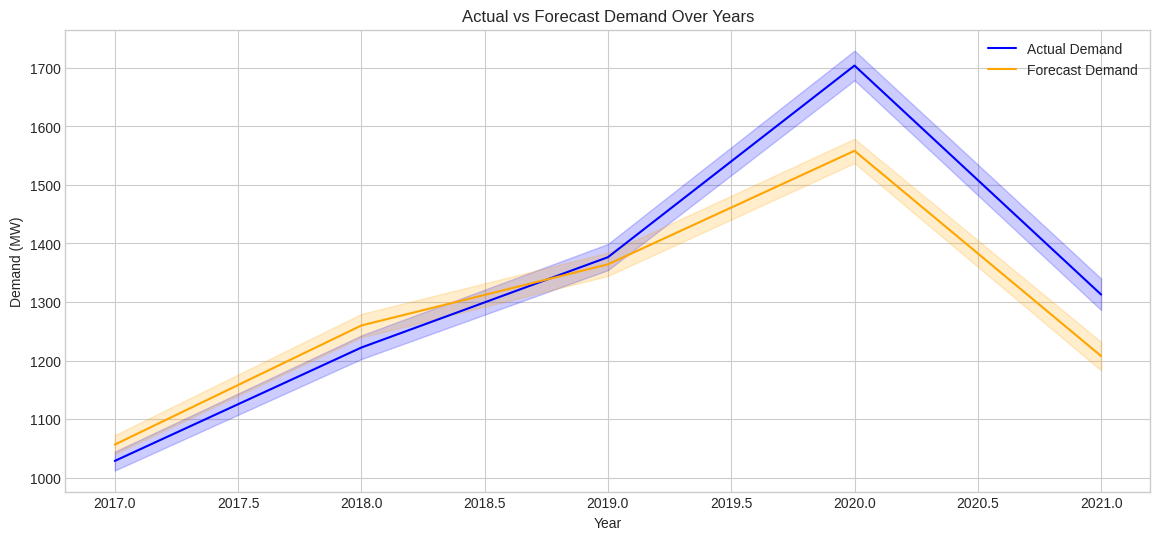

In [59]:
# Line plot for Actual Demand and Forecast Demand over Years
plt.figure(figsize=(14, 6))
sns.lineplot(x='Year', y='ForecastWndMW', data=merged_df_hourly_df, label='Actual Demand', color='blue')
sns.lineplot(x='Year', y='ActualWindMW', data=merged_df_hourly_df, label='Forecast Demand', color='orange')
plt.xlabel('Year')
plt.ylabel('Demand (MW)')
plt.title('Actual vs Forecast Demand Over Years')
plt.legend()
plt.show()

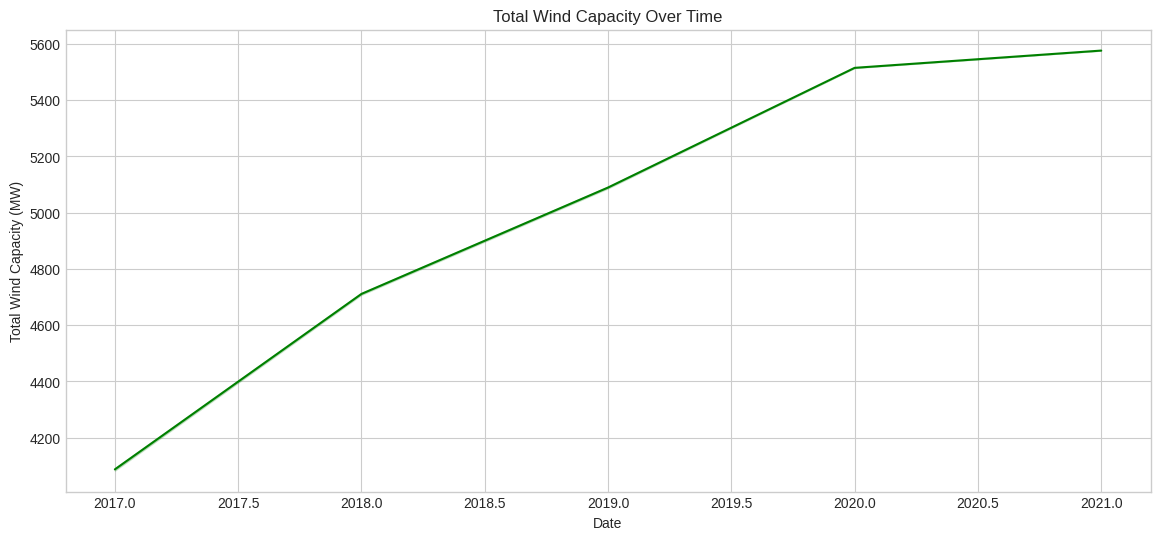

In [60]:
plt.figure(figsize=(14, 6))
sns.lineplot(x='Year', y='TotalWindCapacityMW', data=merged_df_hourly_df, color='green')
plt.xlabel('Date')
plt.ylabel('Total Wind Capacity (MW)')
plt.title('Total Wind Capacity Over Time')
plt.show()


### Box Plot

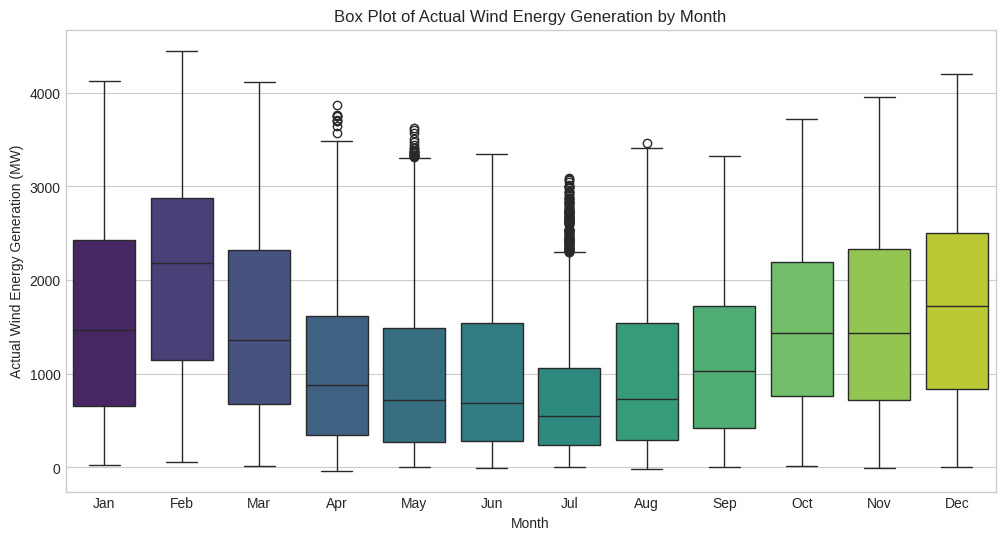

In [61]:
# Box plot of Actual Wind Energy Generation by Month
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='ActualWindMW', data=merged_df_hourly_df, palette='viridis')
plt.xlabel('Month')
plt.ylabel('Actual Wind Energy Generation (MW)')
plt.title('Box Plot of Actual Wind Energy Generation by Month')
plt.show()

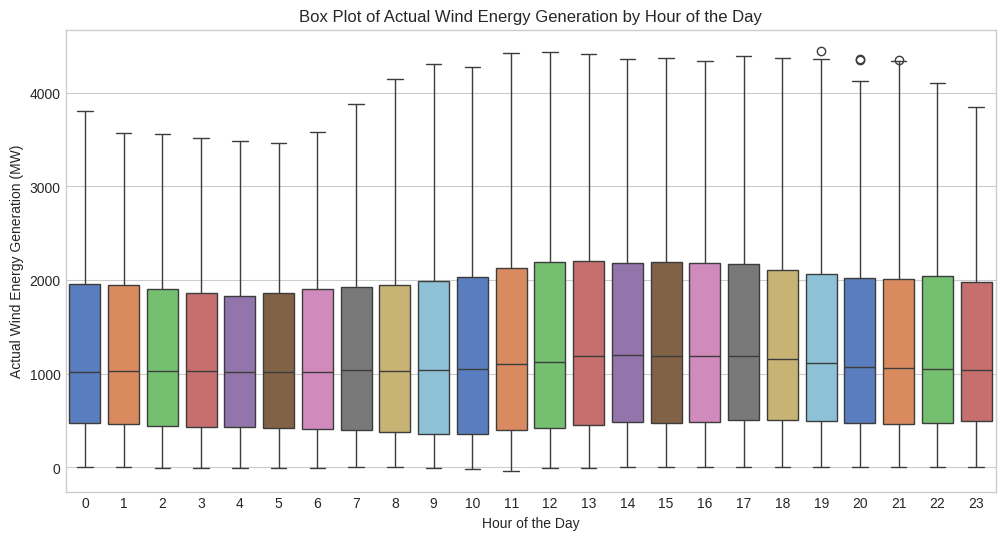

In [62]:
# Box plot of Actual Wind Energy Generation by Hour of the Day
plt.figure(figsize=(12, 6))
sns.boxplot(x='hour', y='ActualWindMW', data=merged_df_hourly_df, palette='muted')
plt.xlabel('Hour of the Day')
plt.ylabel('Actual Wind Energy Generation (MW)')
plt.title('Box Plot of Actual Wind Energy Generation by Hour of the Day')
plt.show()

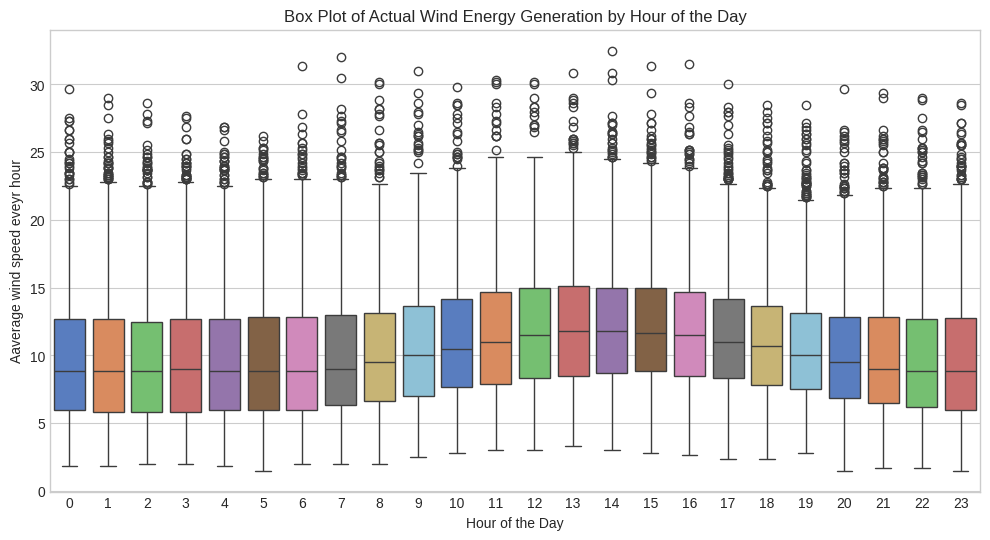

In [63]:
# Box plot of average_wind_speed Generation by Hour of the Day
plt.figure(figsize=(12, 6))
sns.boxplot(x='hour', y='average_wind_speed', data=merged_df_hourly_df, palette='muted')
plt.xlabel('Hour of the Day')
plt.ylabel('Aaverage wind speed eveyr hour')
plt.title('Box Plot of Actual Wind Energy Generation by Hour of the Day')
plt.show()

### BarChart

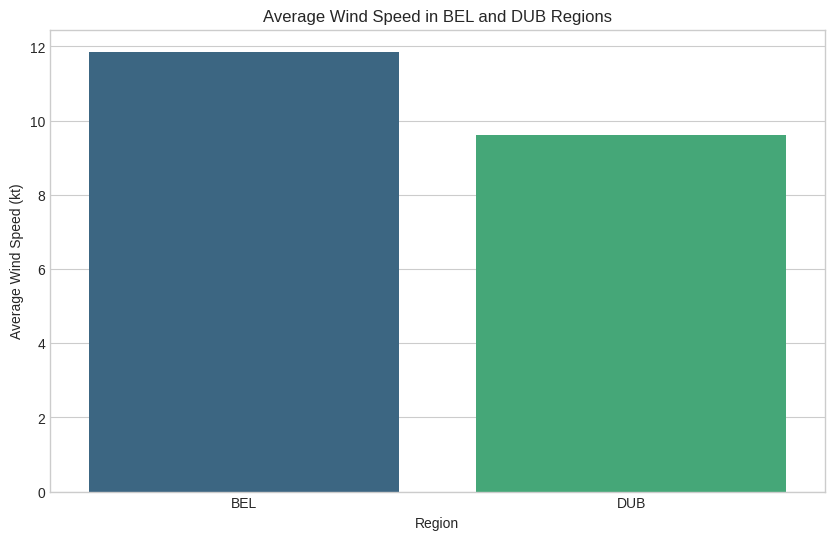

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'windsp_BEL' and 'windsp_DUB' are the columns for wind speed in BEL and DUB regions
# Replace these with the actual column names if they are different

# Create a bar chart for average wind speed in BEL and DUB regions
plt.figure(figsize=(10, 6))
sns.barplot(x=['BEL', 'DUB'], y=[merged_df_hourly_df['wdsp_BEL'].mean(), merged_df_hourly_df['wdsp_DUB'].mean()], palette="viridis")
plt.title('Average Wind Speed in BEL and DUB Regions')
plt.xlabel('Region')
plt.ylabel('Average Wind Speed (kt)')
plt.show()


### HeatMap

### Violinplot

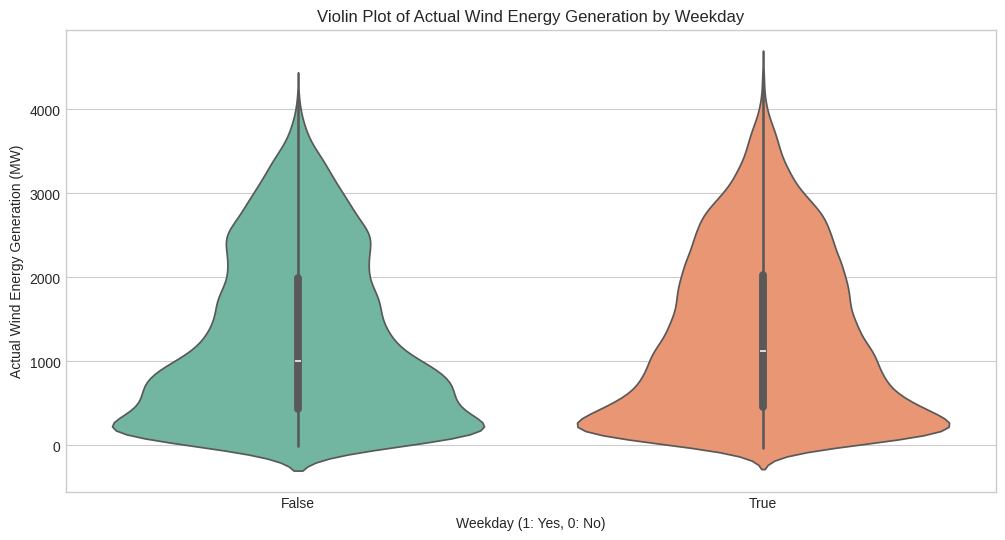

In [65]:
# Violin plot for Actual Wind Energy Generation by weekday
plt.figure(figsize=(12, 6))
sns.violinplot(x='isweekday', y='ActualWindMW', data=merged_df_hourly_df, palette='Set2')
plt.xlabel('Weekday (1: Yes, 0: No)')
plt.ylabel('Actual Wind Energy Generation (MW)')
plt.title('Violin Plot of Actual Wind Energy Generation by Weekday')
plt.show()